# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=50_000 # size of the population to be simulated
size1=30_000_000 # number of timesteps in phase 1 training (callback not used)
size2=60_000_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=30_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include randomness in the state transitions (e.g., maternity leave)

perusmalli='best/malli_perus2'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
deterministic False

include_putki None
step 0.25

predict...
simulating  best/malli_perus2
predicting...




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








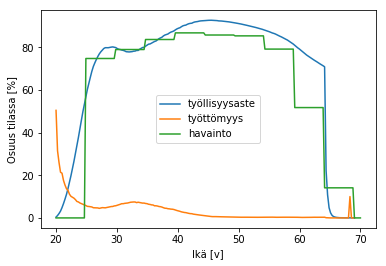

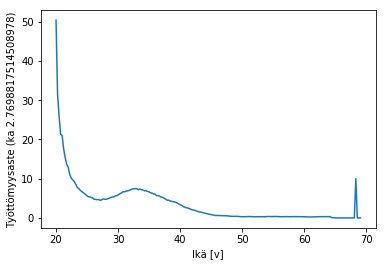

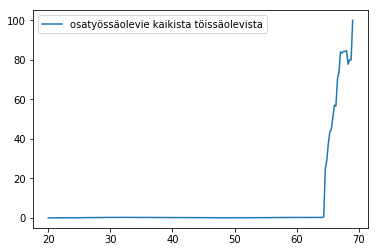

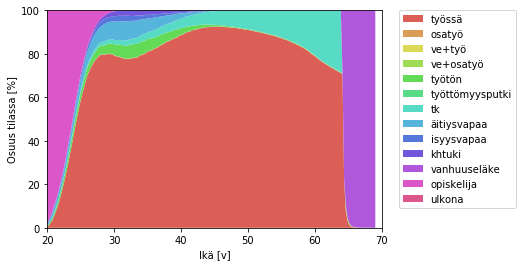

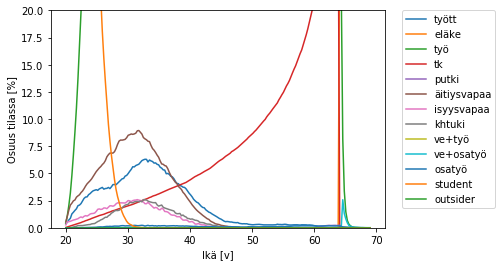

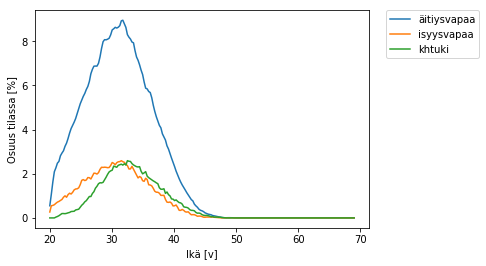

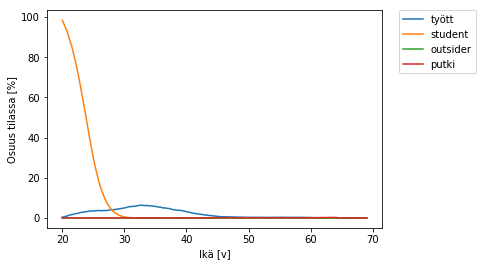

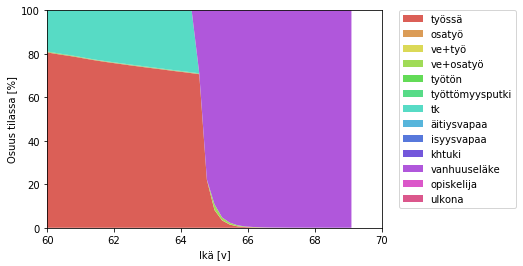

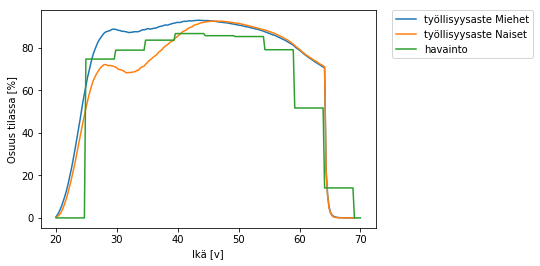

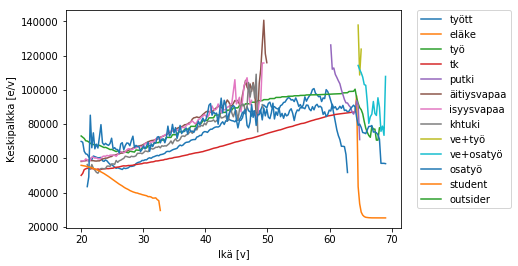

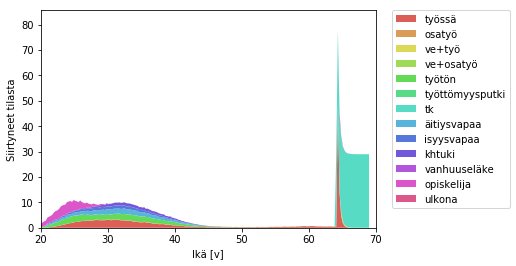

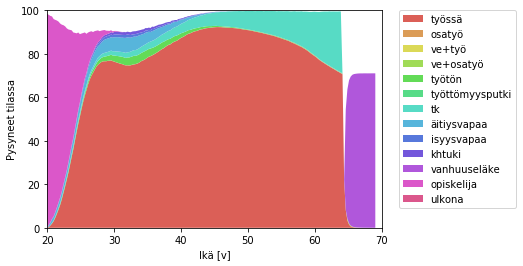

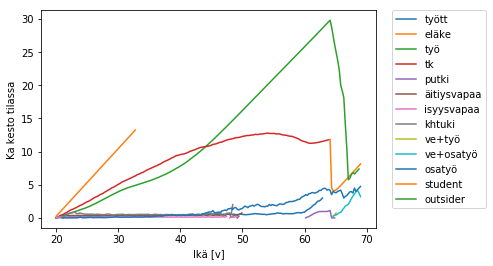

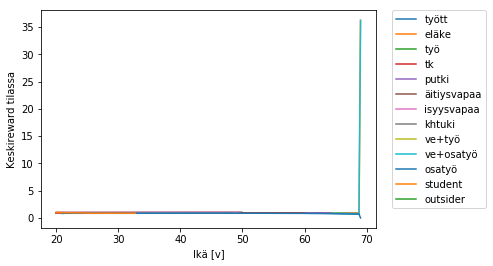

No handles with labels found to put in legend.


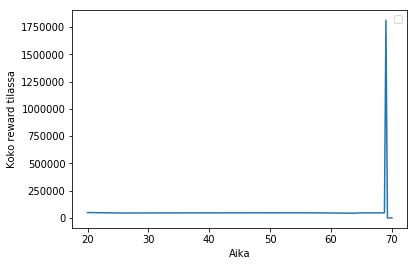

Yhteensä reward 220.69214074995958


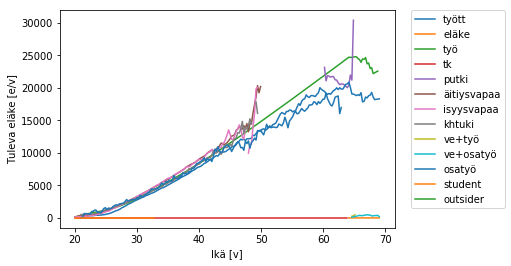

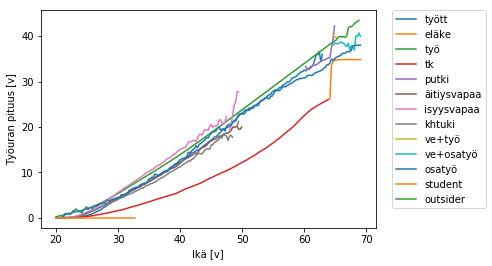

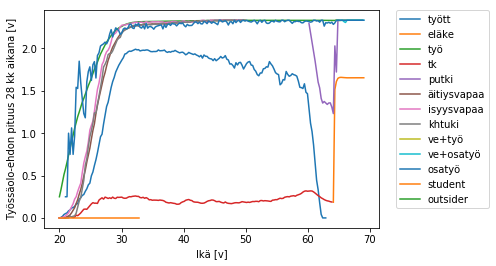

In [3]:


cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              deterministic=deterministic,randomness=randomness)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=False,predict=True,batch1=batch1,batch2=batch2,save=perusmalli,
                plot=True,cont=True,start_from=perusmalli,results='results/perus_results2',
                callback_minsteps=callback_minsteps)
cc1.render(load='results/perus_results2')

In [4]:
#%tensorboard --logdir tmp/tenb

# Porrastettu työttömyysturva



In [5]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=True,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc2_porras.render(load='results/steps_results')


No mortality included
train...
phase 1
batch 1 learning rate 0.25 scaled 0.25

training...








---------------------------------
| explained_variance | 0.875    |
| fps                | 1479     |
| nupdates           | 1        |
| policy_entropy     | 0.711    |
| policy_loss        | -0.351   |
| total_timesteps    | 0        |
| value_loss         | 14.2     |
---------------------------------


---------------------------------
| explained_variance | 0.285    |
| fps                | 2606     |
| nupdates           | 10       |
| policy_entropy     | 0.374    |
| policy_loss        | 2.4      |
| total_timesteps    | 22149    |
| value_loss         | 103      |
---------------------------------
---------------------------------
| explained_variance | 0.411    |
| fps                | 2302     |
| nupdates           | 20       |
| policy_entropy     | 0.35     |
| policy_loss        | 0.0707   |
| total_timesteps    | 46759    |
| value_loss         | 73.7     |
---------------

---------------------------------
| explained_variance | 0.973    |
| fps                | 2072     |
| nupdates           | 190      |
| policy_entropy     | 0.535    |
| policy_loss        | 0.397    |
| total_timesteps    | 465129   |
| value_loss         | 2.22     |
---------------------------------
---------------------------------
| explained_variance | 0.821    |
| fps                | 2070     |
| nupdates           | 200      |
| policy_entropy     | 0.473    |
| policy_loss        | 0.0844   |
| total_timesteps    | 489739   |
| value_loss         | 13       |
---------------------------------
---------------------------------
| explained_variance | 0.83     |
| fps                | 2068     |
| nupdates           | 210      |
| policy_entropy     | 0.49     |
| policy_loss        | 0.229    |
| total_timesteps    | 514349   |
| value_loss         | 9.31     |
---------------------------------
---------------------------------
| explained_variance | 0.913    |
| fps         

---------------------------------
| explained_variance | 0.744    |
| fps                | 2054     |
| nupdates           | 460      |
| policy_entropy     | 0.515    |
| policy_loss        | -0.318   |
| total_timesteps    | 1129599  |
| value_loss         | 18.6     |
---------------------------------
---------------------------------
| explained_variance | 0.892    |
| fps                | 2054     |
| nupdates           | 470      |
| policy_entropy     | 0.573    |
| policy_loss        | 0.08     |
| total_timesteps    | 1154209  |
| value_loss         | 9.31     |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 2053     |
| nupdates           | 480      |
| policy_entropy     | 0.51     |
| policy_loss        | 0.255    |
| total_timesteps    | 1178819  |
| value_loss         | 3.75     |
---------------------------------
---------------------------------
| explained_variance | 0.922    |
| fps         

---------------------------------
| explained_variance | 0.75     |
| fps                | 2051     |
| nupdates           | 730      |
| policy_entropy     | 0.556    |
| policy_loss        | 0.0372   |
| total_timesteps    | 1794069  |
| value_loss         | 13.1     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2051     |
| nupdates           | 740      |
| policy_entropy     | 0.647    |
| policy_loss        | 0.137    |
| total_timesteps    | 1818679  |
| value_loss         | 4.04     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 2051     |
| nupdates           | 750      |
| policy_entropy     | 0.571    |
| policy_loss        | 0.226    |
| total_timesteps    | 1843289  |
| value_loss         | 4.86     |
---------------------------------
---------------------------------
| explained_variance | 0.912    |
| fps         

---------------------------------
| explained_variance | 0.945    |
| fps                | 2051     |
| nupdates           | 1000     |
| policy_entropy     | 0.638    |
| policy_loss        | 0.054    |
| total_timesteps    | 2458539  |
| value_loss         | 5.2      |
---------------------------------
---------------------------------
| explained_variance | 0.74     |
| fps                | 2051     |
| nupdates           | 1010     |
| policy_entropy     | 0.575    |
| policy_loss        | -0.151   |
| total_timesteps    | 2483149  |
| value_loss         | 15.8     |
---------------------------------
---------------------------------
| explained_variance | 0.914    |
| fps                | 2051     |
| nupdates           | 1020     |
| policy_entropy     | 0.555    |
| policy_loss        | 0.421    |
| total_timesteps    | 2507759  |
| value_loss         | 4.65     |
---------------------------------
---------------------------------
| explained_variance | 0.805    |
| fps         

---------------------------------
| explained_variance | 0.863    |
| fps                | 2051     |
| nupdates           | 1270     |
| policy_entropy     | 0.58     |
| policy_loss        | 0.0145   |
| total_timesteps    | 3123009  |
| value_loss         | 10.8     |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2051     |
| nupdates           | 1280     |
| policy_entropy     | 0.558    |
| policy_loss        | 0.379    |
| total_timesteps    | 3147619  |
| value_loss         | 1.53     |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps                | 2051     |
| nupdates           | 1290     |
| policy_entropy     | 0.614    |
| policy_loss        | -0.0155  |
| total_timesteps    | 3172229  |
| value_loss         | 5.91     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.916    |
| fps                | 2051     |
| nupdates           | 1540     |
| policy_entropy     | 0.681    |
| policy_loss        | -0.195   |
| total_timesteps    | 3787479  |
| value_loss         | 11.4     |
---------------------------------
---------------------------------
| explained_variance | 0.921    |
| fps                | 2051     |
| nupdates           | 1550     |
| policy_entropy     | 0.639    |
| policy_loss        | 0.187    |
| total_timesteps    | 3812089  |
| value_loss         | 7.77     |
---------------------------------
---------------------------------
| explained_variance | 0.849    |
| fps                | 2051     |
| nupdates           | 1560     |
| policy_entropy     | 0.622    |
| policy_loss        | -0.724   |
| total_timesteps    | 3836699  |
| value_loss         | 18.3     |
---------------------------------
---------------------------------
| explained_variance | 0.83     |
| fps         

---------------------------------
| explained_variance | 0.864    |
| fps                | 2051     |
| nupdates           | 1810     |
| policy_entropy     | 0.555    |
| policy_loss        | 0.285    |
| total_timesteps    | 4451949  |
| value_loss         | 8.16     |
---------------------------------
---------------------------------
| explained_variance | 0.879    |
| fps                | 2051     |
| nupdates           | 1820     |
| policy_entropy     | 0.688    |
| policy_loss        | -0.606   |
| total_timesteps    | 4476559  |
| value_loss         | 16.1     |
---------------------------------
---------------------------------
| explained_variance | 0.859    |
| fps                | 2051     |
| nupdates           | 1830     |
| policy_entropy     | 0.7      |
| policy_loss        | -0.413   |
| total_timesteps    | 4501169  |
| value_loss         | 15.8     |
---------------------------------
---------------------------------
| explained_variance | 0.723    |
| fps         

---------------------------------
| explained_variance | 0.846    |
| fps                | 2054     |
| nupdates           | 2080     |
| policy_entropy     | 0.608    |
| policy_loss        | -0.272   |
| total_timesteps    | 5116419  |
| value_loss         | 13.1     |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps                | 2054     |
| nupdates           | 2090     |
| policy_entropy     | 0.595    |
| policy_loss        | 0.0273   |
| total_timesteps    | 5141029  |
| value_loss         | 5.77     |
---------------------------------
---------------------------------
| explained_variance | 0.925    |
| fps                | 2054     |
| nupdates           | 2100     |
| policy_entropy     | 0.643    |
| policy_loss        | 0.161    |
| total_timesteps    | 5165639  |
| value_loss         | 7.85     |
---------------------------------
---------------------------------
| explained_variance | 0.844    |
| fps         

---------------------------------
| explained_variance | 0.835    |
| fps                | 2056     |
| nupdates           | 2350     |
| policy_entropy     | 0.572    |
| policy_loss        | 0.0189   |
| total_timesteps    | 5780889  |
| value_loss         | 6.49     |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 2056     |
| nupdates           | 2360     |
| policy_entropy     | 0.598    |
| policy_loss        | -0.189   |
| total_timesteps    | 5805499  |
| value_loss         | 5.1      |
---------------------------------
---------------------------------
| explained_variance | 0.836    |
| fps                | 2056     |
| nupdates           | 2370     |
| policy_entropy     | 0.619    |
| policy_loss        | -0.557   |
| total_timesteps    | 5830109  |
| value_loss         | 19.4     |
---------------------------------
---------------------------------
| explained_variance | 0.759    |
| fps         

---------------------------------
| explained_variance | 0.881    |
| fps                | 2057     |
| nupdates           | 2620     |
| policy_entropy     | 0.546    |
| policy_loss        | -0.543   |
| total_timesteps    | 6445359  |
| value_loss         | 14.1     |
---------------------------------
---------------------------------
| explained_variance | 0.867    |
| fps                | 2057     |
| nupdates           | 2630     |
| policy_entropy     | 0.554    |
| policy_loss        | -0.11    |
| total_timesteps    | 6469969  |
| value_loss         | 15.4     |
---------------------------------
---------------------------------
| explained_variance | 0.913    |
| fps                | 2057     |
| nupdates           | 2640     |
| policy_entropy     | 0.503    |
| policy_loss        | -0.123   |
| total_timesteps    | 6494579  |
| value_loss         | 8.76     |
---------------------------------
---------------------------------
| explained_variance | 0.837    |
| fps         

---------------------------------
| explained_variance | 0.946    |
| fps                | 2058     |
| nupdates           | 2890     |
| policy_entropy     | 0.677    |
| policy_loss        | 0.0428   |
| total_timesteps    | 7109829  |
| value_loss         | 6.02     |
---------------------------------
---------------------------------
| explained_variance | 0.915    |
| fps                | 2058     |
| nupdates           | 2900     |
| policy_entropy     | 0.543    |
| policy_loss        | 0.0975   |
| total_timesteps    | 7134439  |
| value_loss         | 5.81     |
---------------------------------
---------------------------------
| explained_variance | 0.899    |
| fps                | 2058     |
| nupdates           | 2910     |
| policy_entropy     | 0.609    |
| policy_loss        | -0.32    |
| total_timesteps    | 7159049  |
| value_loss         | 10.2     |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps         

---------------------------------
| explained_variance | 0.914    |
| fps                | 2058     |
| nupdates           | 3160     |
| policy_entropy     | 0.611    |
| policy_loss        | -0.109   |
| total_timesteps    | 7774299  |
| value_loss         | 7.93     |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2058     |
| nupdates           | 3170     |
| policy_entropy     | 0.504    |
| policy_loss        | 0.446    |
| total_timesteps    | 7798909  |
| value_loss         | 1.28     |
---------------------------------
---------------------------------
| explained_variance | 0.919    |
| fps                | 2058     |
| nupdates           | 3180     |
| policy_entropy     | 0.534    |
| policy_loss        | 0.0797   |
| total_timesteps    | 7823519  |
| value_loss         | 6.13     |
---------------------------------
---------------------------------
| explained_variance | 0.85     |
| fps         

---------------------------------
| explained_variance | 0.905    |
| fps                | 2057     |
| nupdates           | 3430     |
| policy_entropy     | 0.47     |
| policy_loss        | -0.0332  |
| total_timesteps    | 8438769  |
| value_loss         | 7.82     |
---------------------------------
---------------------------------
| explained_variance | 0.867    |
| fps                | 2057     |
| nupdates           | 3440     |
| policy_entropy     | 0.48     |
| policy_loss        | -0.157   |
| total_timesteps    | 8463379  |
| value_loss         | 15.6     |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 2057     |
| nupdates           | 3450     |
| policy_entropy     | 0.477    |
| policy_loss        | 0.000999 |
| total_timesteps    | 8487989  |
| value_loss         | 5.26     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps         

---------------------------------
| explained_variance | 0.892    |
| fps                | 2054     |
| nupdates           | 3700     |
| policy_entropy     | 0.484    |
| policy_loss        | -0.0464  |
| total_timesteps    | 9103239  |
| value_loss         | 5.38     |
---------------------------------
---------------------------------
| explained_variance | 0.884    |
| fps                | 2054     |
| nupdates           | 3710     |
| policy_entropy     | 0.588    |
| policy_loss        | -0.375   |
| total_timesteps    | 9127849  |
| value_loss         | 14.4     |
---------------------------------
---------------------------------
| explained_variance | 0.857    |
| fps                | 2054     |
| nupdates           | 3720     |
| policy_entropy     | 0.469    |
| policy_loss        | -0.279   |
| total_timesteps    | 9152459  |
| value_loss         | 12       |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.907    |
| fps                | 2049     |
| nupdates           | 3970     |
| policy_entropy     | 0.544    |
| policy_loss        | -0.0246  |
| total_timesteps    | 9767709  |
| value_loss         | 7.18     |
---------------------------------
---------------------------------
| explained_variance | 0.915    |
| fps                | 2049     |
| nupdates           | 3980     |
| policy_entropy     | 0.623    |
| policy_loss        | 0.026    |
| total_timesteps    | 9792319  |
| value_loss         | 6.35     |
---------------------------------
---------------------------------
| explained_variance | 0.731    |
| fps                | 2048     |
| nupdates           | 3990     |
| policy_entropy     | 0.581    |
| policy_loss        | 0.0346   |
| total_timesteps    | 9816929  |
| value_loss         | 22.8     |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.941    |
| fps                | 2042     |
| nupdates           | 4240     |
| policy_entropy     | 0.566    |
| policy_loss        | 0.00807  |
| total_timesteps    | 10432179 |
| value_loss         | 4.41     |
---------------------------------
---------------------------------
| explained_variance | 0.828    |
| fps                | 2041     |
| nupdates           | 4250     |
| policy_entropy     | 0.604    |
| policy_loss        | -0.648   |
| total_timesteps    | 10456789 |
| value_loss         | 19.1     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2041     |
| nupdates           | 4260     |
| policy_entropy     | 0.598    |
| policy_loss        | 0.0364   |
| total_timesteps    | 10481399 |
| value_loss         | 2.99     |
---------------------------------
---------------------------------
| explained_variance | 0.816    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 2033     |
| nupdates           | 4510     |
| policy_entropy     | 0.544    |
| policy_loss        | 0.346    |
| total_timesteps    | 11096649 |
| value_loss         | 1.52     |
---------------------------------
---------------------------------
| explained_variance | 0.69     |
| fps                | 2033     |
| nupdates           | 4520     |
| policy_entropy     | 0.528    |
| policy_loss        | 0.00223  |
| total_timesteps    | 11121259 |
| value_loss         | 18.2     |
---------------------------------
---------------------------------
| explained_variance | 0.609    |
| fps                | 2032     |
| nupdates           | 4530     |
| policy_entropy     | 0.544    |
| policy_loss        | 0.318    |
| total_timesteps    | 11145869 |
| value_loss         | 12.4     |
---------------------------------
---------------------------------
| explained_variance | 0.909    |
| fps         

---------------------------------
| explained_variance | 0.875    |
| fps                | 2024     |
| nupdates           | 4780     |
| policy_entropy     | 0.59     |
| policy_loss        | 0.27     |
| total_timesteps    | 11761119 |
| value_loss         | 6.68     |
---------------------------------
---------------------------------
| explained_variance | 0.875    |
| fps                | 2023     |
| nupdates           | 4790     |
| policy_entropy     | 0.653    |
| policy_loss        | -0.0728  |
| total_timesteps    | 11785729 |
| value_loss         | 12.8     |
---------------------------------
---------------------------------
| explained_variance | 0.837    |
| fps                | 2023     |
| nupdates           | 4800     |
| policy_entropy     | 0.653    |
| policy_loss        | -0.396   |
| total_timesteps    | 11810339 |
| value_loss         | 15.2     |
---------------------------------
---------------------------------
| explained_variance | 0.916    |
| fps         

---------------------------------
| explained_variance | 0.785    |
| fps                | 2015     |
| nupdates           | 5050     |
| policy_entropy     | 0.591    |
| policy_loss        | -0.487   |
| total_timesteps    | 12425589 |
| value_loss         | 19.1     |
---------------------------------
---------------------------------
| explained_variance | 0.783    |
| fps                | 2015     |
| nupdates           | 5060     |
| policy_entropy     | 0.61     |
| policy_loss        | -0.226   |
| total_timesteps    | 12450199 |
| value_loss         | 25.6     |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 2014     |
| nupdates           | 5070     |
| policy_entropy     | 0.594    |
| policy_loss        | 0.203    |
| total_timesteps    | 12474809 |
| value_loss         | 3.92     |
---------------------------------
---------------------------------
| explained_variance | 0.787    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2007     |
| nupdates           | 5320     |
| policy_entropy     | 0.572    |
| policy_loss        | 0.302    |
| total_timesteps    | 13090059 |
| value_loss         | 3.45     |
---------------------------------
---------------------------------
| explained_variance | 0.757    |
| fps                | 2007     |
| nupdates           | 5330     |
| policy_entropy     | 0.533    |
| policy_loss        | 0.539    |
| total_timesteps    | 13114669 |
| value_loss         | 7.85     |
---------------------------------
---------------------------------
| explained_variance | 0.784    |
| fps                | 2007     |
| nupdates           | 5340     |
| policy_entropy     | 0.545    |
| policy_loss        | -0.47    |
| total_timesteps    | 13139279 |
| value_loss         | 21.4     |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps         

---------------------------------
| explained_variance | 0.81     |
| fps                | 2000     |
| nupdates           | 5590     |
| policy_entropy     | 0.533    |
| policy_loss        | 0.143    |
| total_timesteps    | 13754529 |
| value_loss         | 12.1     |
---------------------------------
---------------------------------
| explained_variance | 0.821    |
| fps                | 2000     |
| nupdates           | 5600     |
| policy_entropy     | 0.65     |
| policy_loss        | -0.884   |
| total_timesteps    | 13779139 |
| value_loss         | 26.4     |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps                | 2000     |
| nupdates           | 5610     |
| policy_entropy     | 0.522    |
| policy_loss        | 0.161    |
| total_timesteps    | 13803749 |
| value_loss         | 4.09     |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps         

---------------------------------
| explained_variance | 0.899    |
| fps                | 1994     |
| nupdates           | 5860     |
| policy_entropy     | 0.583    |
| policy_loss        | -0.123   |
| total_timesteps    | 14418999 |
| value_loss         | 10.3     |
---------------------------------
---------------------------------
| explained_variance | 0.799    |
| fps                | 1994     |
| nupdates           | 5870     |
| policy_entropy     | 0.581    |
| policy_loss        | -0.703   |
| total_timesteps    | 14443609 |
| value_loss         | 18.2     |
---------------------------------
---------------------------------
| explained_variance | 0.84     |
| fps                | 1993     |
| nupdates           | 5880     |
| policy_entropy     | 0.536    |
| policy_loss        | 0.0675   |
| total_timesteps    | 14468219 |
| value_loss         | 15.7     |
---------------------------------
---------------------------------
| explained_variance | 0.867    |
| fps         

---------------------------------
| explained_variance | 0.805    |
| fps                | 1987     |
| nupdates           | 6130     |
| policy_entropy     | 0.566    |
| policy_loss        | -0.151   |
| total_timesteps    | 15083469 |
| value_loss         | 18.6     |
---------------------------------
---------------------------------
| explained_variance | 0.737    |
| fps                | 1987     |
| nupdates           | 6140     |
| policy_entropy     | 0.481    |
| policy_loss        | 0.119    |
| total_timesteps    | 15108079 |
| value_loss         | 20.6     |
---------------------------------
---------------------------------
| explained_variance | 0.798    |
| fps                | 1986     |
| nupdates           | 6150     |
| policy_entropy     | 0.497    |
| policy_loss        | -0.125   |
| total_timesteps    | 15132689 |
| value_loss         | 10.5     |
---------------------------------
---------------------------------
| explained_variance | 0.876    |
| fps         

---------------------------------
| explained_variance | 0.83     |
| fps                | 1980     |
| nupdates           | 6400     |
| policy_entropy     | 0.579    |
| policy_loss        | -0.0751  |
| total_timesteps    | 15747939 |
| value_loss         | 14.5     |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1980     |
| nupdates           | 6410     |
| policy_entropy     | 0.561    |
| policy_loss        | 0.123    |
| total_timesteps    | 15772549 |
| value_loss         | 3.8      |
---------------------------------
---------------------------------
| explained_variance | 0.877    |
| fps                | 1979     |
| nupdates           | 6420     |
| policy_entropy     | 0.508    |
| policy_loss        | 0.168    |
| total_timesteps    | 15797159 |
| value_loss         | 8.13     |
---------------------------------
---------------------------------
| explained_variance | 0.862    |
| fps         

---------------------------------
| explained_variance | 0.871    |
| fps                | 1972     |
| nupdates           | 6670     |
| policy_entropy     | 0.416    |
| policy_loss        | 0.00805  |
| total_timesteps    | 16412409 |
| value_loss         | 6.86     |
---------------------------------
---------------------------------
| explained_variance | 0.863    |
| fps                | 1972     |
| nupdates           | 6680     |
| policy_entropy     | 0.491    |
| policy_loss        | 0.0485   |
| total_timesteps    | 16437019 |
| value_loss         | 11.8     |
---------------------------------
---------------------------------
| explained_variance | 0.711    |
| fps                | 1972     |
| nupdates           | 6690     |
| policy_entropy     | 0.429    |
| policy_loss        | 0.107    |
| total_timesteps    | 16461629 |
| value_loss         | 12.4     |
---------------------------------
---------------------------------
| explained_variance | 0.808    |
| fps         

---------------------------------
| explained_variance | 0.876    |
| fps                | 1964     |
| nupdates           | 6940     |
| policy_entropy     | 0.534    |
| policy_loss        | -0.154   |
| total_timesteps    | 17076879 |
| value_loss         | 11.4     |
---------------------------------
---------------------------------
| explained_variance | 0.676    |
| fps                | 1963     |
| nupdates           | 6950     |
| policy_entropy     | 0.553    |
| policy_loss        | -0.0663  |
| total_timesteps    | 17101489 |
| value_loss         | 29.9     |
---------------------------------
---------------------------------
| explained_variance | 0.887    |
| fps                | 1963     |
| nupdates           | 6960     |
| policy_entropy     | 0.499    |
| policy_loss        | 0.084    |
| total_timesteps    | 17126099 |
| value_loss         | 6.37     |
---------------------------------
---------------------------------
| explained_variance | 0.819    |
| fps         

---------------------------------
| explained_variance | 0.947    |
| fps                | 1956     |
| nupdates           | 7210     |
| policy_entropy     | 0.565    |
| policy_loss        | 0.0887   |
| total_timesteps    | 17741349 |
| value_loss         | 4.9      |
---------------------------------
---------------------------------
| explained_variance | 0.819    |
| fps                | 1955     |
| nupdates           | 7220     |
| policy_entropy     | 0.491    |
| policy_loss        | -0.00186 |
| total_timesteps    | 17765959 |
| value_loss         | 5.74     |
---------------------------------
---------------------------------
| explained_variance | 0.839    |
| fps                | 1955     |
| nupdates           | 7230     |
| policy_entropy     | 0.536    |
| policy_loss        | -0.131   |
| total_timesteps    | 17790569 |
| value_loss         | 11.3     |
---------------------------------
---------------------------------
| explained_variance | 0.863    |
| fps         

---------------------------------
| explained_variance | 0.871    |
| fps                | 1945     |
| nupdates           | 7480     |
| policy_entropy     | 0.525    |
| policy_loss        | 0.3      |
| total_timesteps    | 18405819 |
| value_loss         | 6.91     |
---------------------------------
---------------------------------
| explained_variance | 0.797    |
| fps                | 1945     |
| nupdates           | 7490     |
| policy_entropy     | 0.529    |
| policy_loss        | -0.157   |
| total_timesteps    | 18430429 |
| value_loss         | 18.1     |
---------------------------------
---------------------------------
| explained_variance | 0.866    |
| fps                | 1944     |
| nupdates           | 7500     |
| policy_entropy     | 0.488    |
| policy_loss        | 0.456    |
| total_timesteps    | 18455039 |
| value_loss         | 5.78     |
---------------------------------
---------------------------------
| explained_variance | 0.888    |
| fps         

---------------------------------
| explained_variance | 0.922    |
| fps                | 1932     |
| nupdates           | 7750     |
| policy_entropy     | 0.543    |
| policy_loss        | 0.176    |
| total_timesteps    | 19070289 |
| value_loss         | 4.05     |
---------------------------------
---------------------------------
| explained_variance | 0.811    |
| fps                | 1932     |
| nupdates           | 7760     |
| policy_entropy     | 0.453    |
| policy_loss        | 0.0545   |
| total_timesteps    | 19094899 |
| value_loss         | 11.2     |
---------------------------------
---------------------------------
| explained_variance | 0.781    |
| fps                | 1931     |
| nupdates           | 7770     |
| policy_entropy     | 0.529    |
| policy_loss        | -0.266   |
| total_timesteps    | 19119509 |
| value_loss         | 15.4     |
---------------------------------
---------------------------------
| explained_variance | 0.887    |
| fps         

---------------------------------
| explained_variance | 0.913    |
| fps                | 1920     |
| nupdates           | 8020     |
| policy_entropy     | 0.529    |
| policy_loss        | -0.219   |
| total_timesteps    | 19734759 |
| value_loss         | 7.57     |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps                | 1919     |
| nupdates           | 8030     |
| policy_entropy     | 0.624    |
| policy_loss        | 0.0163   |
| total_timesteps    | 19759369 |
| value_loss         | 7.48     |
---------------------------------
---------------------------------
| explained_variance | 0.847    |
| fps                | 1919     |
| nupdates           | 8040     |
| policy_entropy     | 0.507    |
| policy_loss        | 0.211    |
| total_timesteps    | 19783979 |
| value_loss         | 8.07     |
---------------------------------
---------------------------------
| explained_variance | 0.791    |
| fps         

---------------------------------
| explained_variance | 0.924    |
| fps                | 1907     |
| nupdates           | 8290     |
| policy_entropy     | 0.539    |
| policy_loss        | 0.269    |
| total_timesteps    | 20399229 |
| value_loss         | 5.98     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 1906     |
| nupdates           | 8300     |
| policy_entropy     | 0.577    |
| policy_loss        | 0.00227  |
| total_timesteps    | 20423839 |
| value_loss         | 4.21     |
---------------------------------
---------------------------------
| explained_variance | 0.785    |
| fps                | 1906     |
| nupdates           | 8310     |
| policy_entropy     | 0.496    |
| policy_loss        | -0.134   |
| total_timesteps    | 20448449 |
| value_loss         | 14.4     |
---------------------------------
---------------------------------
| explained_variance | 0.603    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1901     |
| nupdates           | 8560     |
| policy_entropy     | 0.642    |
| policy_loss        | 0.0438   |
| total_timesteps    | 21063699 |
| value_loss         | 3.51     |
---------------------------------
---------------------------------
| explained_variance | 0.832    |
| fps                | 1900     |
| nupdates           | 8570     |
| policy_entropy     | 0.488    |
| policy_loss        | 0.0925   |
| total_timesteps    | 21088309 |
| value_loss         | 8.34     |
---------------------------------
---------------------------------
| explained_variance | 0.881    |
| fps                | 1900     |
| nupdates           | 8580     |
| policy_entropy     | 0.601    |
| policy_loss        | -0.175   |
| total_timesteps    | 21112919 |
| value_loss         | 9.62     |
---------------------------------
---------------------------------
| explained_variance | 0.77     |
| fps         

---------------------------------
| explained_variance | 0.89     |
| fps                | 1896     |
| nupdates           | 8830     |
| policy_entropy     | 0.44     |
| policy_loss        | 0.146    |
| total_timesteps    | 21728169 |
| value_loss         | 3.31     |
---------------------------------
---------------------------------
| explained_variance | 0.847    |
| fps                | 1896     |
| nupdates           | 8840     |
| policy_entropy     | 0.539    |
| policy_loss        | -0.328   |
| total_timesteps    | 21752779 |
| value_loss         | 13.8     |
---------------------------------
---------------------------------
| explained_variance | 0.709    |
| fps                | 1896     |
| nupdates           | 8850     |
| policy_entropy     | 0.518    |
| policy_loss        | -0.577   |
| total_timesteps    | 21777389 |
| value_loss         | 31.9     |
---------------------------------
---------------------------------
| explained_variance | 0.91     |
| fps         

---------------------------------
| explained_variance | 0.795    |
| fps                | 1892     |
| nupdates           | 9100     |
| policy_entropy     | 0.608    |
| policy_loss        | -1.03    |
| total_timesteps    | 22392639 |
| value_loss         | 28       |
---------------------------------
---------------------------------
| explained_variance | 0.832    |
| fps                | 1891     |
| nupdates           | 9110     |
| policy_entropy     | 0.477    |
| policy_loss        | -0.066   |
| total_timesteps    | 22417249 |
| value_loss         | 9.45     |
---------------------------------
---------------------------------
| explained_variance | 0.776    |
| fps                | 1891     |
| nupdates           | 9120     |
| policy_entropy     | 0.54     |
| policy_loss        | -0.267   |
| total_timesteps    | 22441859 |
| value_loss         | 19.6     |
---------------------------------
---------------------------------
| explained_variance | 0.867    |
| fps         

---------------------------------
| explained_variance | 0.796    |
| fps                | 1889     |
| nupdates           | 9370     |
| policy_entropy     | 0.523    |
| policy_loss        | -0.201   |
| total_timesteps    | 23057109 |
| value_loss         | 14.2     |
---------------------------------
---------------------------------
| explained_variance | 0.833    |
| fps                | 1889     |
| nupdates           | 9380     |
| policy_entropy     | 0.571    |
| policy_loss        | -0.28    |
| total_timesteps    | 23081719 |
| value_loss         | 16.8     |
---------------------------------
---------------------------------
| explained_variance | 0.81     |
| fps                | 1889     |
| nupdates           | 9390     |
| policy_entropy     | 0.457    |
| policy_loss        | -0.0437  |
| total_timesteps    | 23106329 |
| value_loss         | 6.42     |
---------------------------------
---------------------------------
| explained_variance | 0.835    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 1887     |
| nupdates           | 9640     |
| policy_entropy     | 0.547    |
| policy_loss        | 0.202    |
| total_timesteps    | 23721579 |
| value_loss         | 1.76     |
---------------------------------
---------------------------------
| explained_variance | 0.917    |
| fps                | 1887     |
| nupdates           | 9650     |
| policy_entropy     | 0.544    |
| policy_loss        | -0.126   |
| total_timesteps    | 23746189 |
| value_loss         | 7.21     |
---------------------------------
---------------------------------
| explained_variance | 0.923    |
| fps                | 1887     |
| nupdates           | 9660     |
| policy_entropy     | 0.577    |
| policy_loss        | -0.136   |
| total_timesteps    | 23770799 |
| value_loss         | 8.25     |
---------------------------------
---------------------------------
| explained_variance | 0.816    |
| fps         

---------------------------------
| explained_variance | 0.889    |
| fps                | 1884     |
| nupdates           | 9910     |
| policy_entropy     | 0.496    |
| policy_loss        | -0.0146  |
| total_timesteps    | 24386049 |
| value_loss         | 9.77     |
---------------------------------
---------------------------------
| explained_variance | 0.86     |
| fps                | 1884     |
| nupdates           | 9920     |
| policy_entropy     | 0.462    |
| policy_loss        | -0.137   |
| total_timesteps    | 24410659 |
| value_loss         | 13       |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 1884     |
| nupdates           | 9930     |
| policy_entropy     | 0.546    |
| policy_loss        | -0.0905  |
| total_timesteps    | 24435269 |
| value_loss         | 11       |
---------------------------------
---------------------------------
| explained_variance | 0.866    |
| fps         

---------------------------------
| explained_variance | 0.902    |
| fps                | 1880     |
| nupdates           | 10180    |
| policy_entropy     | 0.592    |
| policy_loss        | -0.216   |
| total_timesteps    | 25050519 |
| value_loss         | 11.9     |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 1880     |
| nupdates           | 10190    |
| policy_entropy     | 0.546    |
| policy_loss        | -0.058   |
| total_timesteps    | 25075129 |
| value_loss         | 9.01     |
---------------------------------
---------------------------------
| explained_variance | 0.801    |
| fps                | 1880     |
| nupdates           | 10200    |
| policy_entropy     | 0.489    |
| policy_loss        | -0.339   |
| total_timesteps    | 25099739 |
| value_loss         | 17.4     |
---------------------------------
---------------------------------
| explained_variance | 0.809    |
| fps         

---------------------------------
| explained_variance | 0.83     |
| fps                | 1874     |
| nupdates           | 10450    |
| policy_entropy     | 0.512    |
| policy_loss        | 0.102    |
| total_timesteps    | 25714989 |
| value_loss         | 11.5     |
---------------------------------
---------------------------------
| explained_variance | 0.667    |
| fps                | 1874     |
| nupdates           | 10460    |
| policy_entropy     | 0.481    |
| policy_loss        | 0.323    |
| total_timesteps    | 25739599 |
| value_loss         | 11.9     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1874     |
| nupdates           | 10470    |
| policy_entropy     | 0.505    |
| policy_loss        | 0.273    |
| total_timesteps    | 25764209 |
| value_loss         | 1.76     |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps         

---------------------------------
| explained_variance | 0.924    |
| fps                | 1868     |
| nupdates           | 10720    |
| policy_entropy     | 0.445    |
| policy_loss        | 0.207    |
| total_timesteps    | 26379459 |
| value_loss         | 2.78     |
---------------------------------
---------------------------------
| explained_variance | 0.822    |
| fps                | 1867     |
| nupdates           | 10730    |
| policy_entropy     | 0.607    |
| policy_loss        | -0.229   |
| total_timesteps    | 26404069 |
| value_loss         | 19.4     |
---------------------------------
---------------------------------
| explained_variance | 0.843    |
| fps                | 1867     |
| nupdates           | 10740    |
| policy_entropy     | 0.538    |
| policy_loss        | -0.0835  |
| total_timesteps    | 26428679 |
| value_loss         | 11.2     |
---------------------------------
---------------------------------
| explained_variance | 0.885    |
| fps         

---------------------------------
| explained_variance | 0.834    |
| fps                | 1862     |
| nupdates           | 10990    |
| policy_entropy     | 0.465    |
| policy_loss        | -0.0541  |
| total_timesteps    | 27043929 |
| value_loss         | 11.5     |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1861     |
| nupdates           | 11000    |
| policy_entropy     | 0.574    |
| policy_loss        | 0.108    |
| total_timesteps    | 27068539 |
| value_loss         | 4.2      |
---------------------------------
---------------------------------
| explained_variance | 0.874    |
| fps                | 1861     |
| nupdates           | 11010    |
| policy_entropy     | 0.522    |
| policy_loss        | 0.144    |
| total_timesteps    | 27093149 |
| value_loss         | 9.13     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 1856     |
| nupdates           | 11260    |
| policy_entropy     | 0.543    |
| policy_loss        | 0.0464   |
| total_timesteps    | 27708399 |
| value_loss         | 4.78     |
---------------------------------
---------------------------------
| explained_variance | 0.863    |
| fps                | 1856     |
| nupdates           | 11270    |
| policy_entropy     | 0.607    |
| policy_loss        | -0.316   |
| total_timesteps    | 27733009 |
| value_loss         | 12.8     |
---------------------------------
---------------------------------
| explained_variance | 0.914    |
| fps                | 1856     |
| nupdates           | 11280    |
| policy_entropy     | 0.646    |
| policy_loss        | -0.405   |
| total_timesteps    | 27757619 |
| value_loss         | 10.2     |
---------------------------------
---------------------------------
| explained_variance | 0.832    |
| fps         

---------------------------------
| explained_variance | 0.793    |
| fps                | 1853     |
| nupdates           | 11530    |
| policy_entropy     | 0.489    |
| policy_loss        | -0.296   |
| total_timesteps    | 28372869 |
| value_loss         | 18.1     |
---------------------------------
---------------------------------
| explained_variance | 0.827    |
| fps                | 1853     |
| nupdates           | 11540    |
| policy_entropy     | 0.487    |
| policy_loss        | -0.183   |
| total_timesteps    | 28397479 |
| value_loss         | 13.9     |
---------------------------------
---------------------------------
| explained_variance | 0.82     |
| fps                | 1853     |
| nupdates           | 11550    |
| policy_entropy     | 0.512    |
| policy_loss        | -0.247   |
| total_timesteps    | 28422089 |
| value_loss         | 16.6     |
---------------------------------
---------------------------------
| explained_variance | 0.805    |
| fps         

---------------------------------
| explained_variance | 0.833    |
| fps                | 1850     |
| nupdates           | 11800    |
| policy_entropy     | 0.44     |
| policy_loss        | -0.196   |
| total_timesteps    | 29037339 |
| value_loss         | 6.94     |
---------------------------------
---------------------------------
| explained_variance | 0.681    |
| fps                | 1850     |
| nupdates           | 11810    |
| policy_entropy     | 0.435    |
| policy_loss        | -0.139   |
| total_timesteps    | 29061949 |
| value_loss         | 20.1     |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 1850     |
| nupdates           | 11820    |
| policy_entropy     | 0.51     |
| policy_loss        | 0.0351   |
| total_timesteps    | 29086559 |
| value_loss         | 4.65     |
---------------------------------
---------------------------------
| explained_variance | 0.838    |
| fps         

---------------------------------
| explained_variance | 0.798    |
| fps                | 1848     |
| nupdates           | 12070    |
| policy_entropy     | 0.525    |
| policy_loss        | -0.21    |
| total_timesteps    | 29701809 |
| value_loss         | 15.7     |
---------------------------------
---------------------------------
| explained_variance | 0.827    |
| fps                | 1848     |
| nupdates           | 12080    |
| policy_entropy     | 0.531    |
| policy_loss        | -0.324   |
| total_timesteps    | 29726419 |
| value_loss         | 20.8     |
---------------------------------
---------------------------------
| explained_variance | 0.797    |
| fps                | 1848     |
| nupdates           | 12090    |
| policy_entropy     | 0.513    |
| policy_loss        | -0.398   |
| total_timesteps    | 29751029 |
| value_loss         | 21.4     |
---------------------------------
---------------------------------
| explained_variance | 0.816    |
| fps         

1842768 timesteps 9168 episodes
Best mean reward: 219.91 - Last mean reward per episode: 215.89
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 211.44998 |
| explained_variance | 0.245     |
| fps                | 2901      |
| nupdates           | 10        |
| policy_entropy     | 0.632     |
| policy_loss        | 10.2      |
| total_timesteps    | 1660509   |
| value_loss         | 321       |
----------------------------------
2028492 timesteps 10092 episodes
Best mean reward: 219.91 - Last mean reward per episode: 214.89
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 215.85562 |
| explained_variance | 0.239     |
| fps                | 2899      |
| nupdates           | 11        |
| policy_entropy     | 0.84      |
| policy_loss        | 9.9       |
| total_timesteps    | 1845010   |
| value_loss         | 211       |
----------------------------------
2211804 timesteps 11004 episodes
Best

5164092 timesteps 25692 episodes
Best mean reward: 219.91 - Last mean reward per episode: 217.40
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 219.47362 |
| explained_variance | -0.634    |
| fps                | 2886      |
| nupdates           | 28        |
| policy_entropy     | 0.79      |
| policy_loss        | -30.2     |
| total_timesteps    | 4981527   |
| value_loss         | 1.61e+03  |
----------------------------------
5349816 timesteps 26616 episodes
Best mean reward: 219.91 - Last mean reward per episode: 216.78
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 221.75404 |
| explained_variance | -0.615    |
| fps                | 2885      |
| nupdates           | 29        |
| policy_entropy     | 0.795     |
| policy_loss        | -30.6     |
| total_timesteps    | 5166028   |
| value_loss         | 1.61e+03  |
----------------------------------
5533128 timesteps 27528 episodes
Bes

8302104 timesteps 41304 episodes
Best mean reward: 219.91 - Last mean reward per episode: 216.35
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 219.28117 |
| explained_variance | -0.265    |
| fps                | 2882      |
| nupdates           | 45        |
| policy_entropy     | 0.894     |
| policy_loss        | -27.9     |
| total_timesteps    | 8118044   |
| value_loss         | 1.05e+03  |
----------------------------------
8485416 timesteps 42216 episodes
Best mean reward: 219.91 - Last mean reward per episode: 216.37
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 215.7731 |
| explained_variance | -0.191   |
| fps                | 2881     |
| nupdates           | 46       |
| policy_entropy     | 0.903    |
| policy_loss        | -27.8    |
| total_timesteps    | 8302545  |
| value_loss         | 1.02e+03 |
---------------------------------
8671140 timesteps 43140 episodes
Best mean rewa

11623428 timesteps 57828 episodes
Best mean reward: 219.91 - Last mean reward per episode: 215.82
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 217.92796 |
| explained_variance | 0.0683    |
| fps                | 2881      |
| nupdates           | 63        |
| policy_entropy     | 0.946     |
| policy_loss        | -20.3     |
| total_timesteps    | 11439062  |
| value_loss         | 491       |
----------------------------------
11806740 timesteps 58740 episodes
Best mean reward: 219.91 - Last mean reward per episode: 217.84
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 216.47635 |
| explained_variance | 0.0684    |
| fps                | 2881      |
| nupdates           | 64        |
| policy_entropy     | 0.934     |
| policy_loss        | -19.9     |
| total_timesteps    | 11623563  |
| value_loss         | 472       |
----------------------------------
11992464 timesteps 59664 episodes


14942340 timesteps 74340 episodes
Best mean reward: 219.91 - Last mean reward per episode: 215.53
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 212.51102 |
| explained_variance | 0.401     |
| fps                | 2882      |
| nupdates           | 81        |
| policy_entropy     | 0.842     |
| policy_loss        | -9.67     |
| total_timesteps    | 14760080  |
| value_loss         | 161       |
----------------------------------
15128064 timesteps 75264 episodes
Best mean reward: 219.91 - Last mean reward per episode: 215.21
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 215.33931 |
| explained_variance | 0.413     |
| fps                | 2882      |
| nupdates           | 82        |
| policy_entropy     | 0.836     |
| policy_loss        | -9.22     |
| total_timesteps    | 14944581  |
| value_loss         | 150       |
----------------------------------
15311376 timesteps 76176 episodes


KeyboardInterrupt: 

In [ ]:
cc2_porras.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputki on suosittu elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [ ]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps)
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1)                    

In [ ]:
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1) 

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [ ]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from='best/malli_perus',cont=True,
                callback_minsteps=callback_minsteps)
cc2.render(load='results/ek_results')
cc2.load_sim(load='results/ek_results')

In [ ]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_toe.render(load='results/12kk_results')
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps)
cc1_350.render(load='results/50pv_results')
cc1_350.compare_with(cc1)

# Perustulo

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_pt.render(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_400.render(load='results/300pv_results')
cc1_400.compare_with(cc1)